## Model Introduction 

### Python Study

In [1]:
# pip install pymc3;

In [2]:
# pip install seaborn

In [3]:
%pylab inline 
# magic fucntion in ipython. It loads major numerical and plotting libraries

import pandas as pd

import pymc3 as pm
# probabilistic programming language

# import class for constructing random walks
from pymc3.distributions.timeseries import GaussianRandomWalk
import theano.tensor as tt

#import some special methods
from scipy.special import logit,expit
import scipy.stats as stats

# set some plotting parameters to create ggplot-style plots
import seaborn as sns
import matplotlib as mpl
sns.set_context(context='talk',font_scale=1.5)
plt.style.use('ggplot')
mpl.rcParams['axes.labelsize'] = 24

#interactive plotting tools
from ipywidgets import interactive

Populating the interactive namespace from numpy and matplotlib


In [4]:
N, p = 10000, 0.01
x = np.random.binomial(N,p,size=1000)

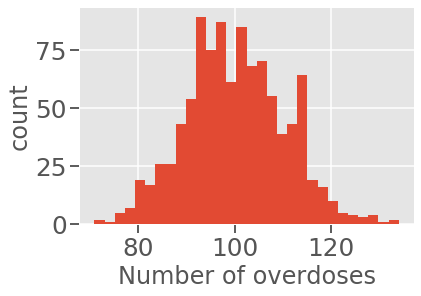

In [5]:
plt.figure(); # ; on plt suppress output
plt.hist(x, bins=30);
plt.xlabel("Number of overdoses");
plt.ylabel("count");

**Important: Shift + tap shows me info about method.**

In [6]:
n_months =12
n_samples = 1000
N,p = 10000,0.01
x = np.random.binomial(N,p, size = (n_samples,n_months))

print('Data generated is a {} by {} array'.format(*x.shape))

Data generated is a 1000 by 12 array


In [7]:
def plot_data_timeseries(ys, x=None, xlabel="Month", ylabel="Overdoses", new_plot=True, color="#E14A33", label=None):
    
    '''
    brief intro: plot 95 and IQR
    parameters:
    -----
    ys: sample size by time numpy array 
    x: x axis as time
    xlabel: string
    ylabel: string
    new_plot: boolean
        plotting to a new figure or not
    color: str
    label: str
    return
    -----
    
    
    '''
    if x is None:
        x = np.arange(1,ys.shape[1]+1)
    
    if new_plot: plt.figure;
        # if we wanna make a new plot, then by using plt.figure function,
        # we create a new plot figure
        
    lc, liqr, m, uiqr, uc = np.percentile(ys, [2.5,25,50,75,97.5], axis=0);
    # now it's time to use the (already) existing plot figure
    plt.fill_between(x, lc, uc,alpha=0.2 ,color=color);
    plt.fill_between(x, liqr, uiqr, color=color, alpha=0.2);
    plt.plot(x,m, color= color, label = label);
    plt.xlabel(xlabel);plt.ylabel(ylabel);
    
    

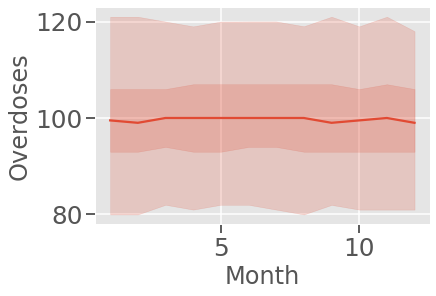

In [8]:
plot_data_timeseries(x)

Broadcasting rule is how numpy treat different arrays in dimensions.

In [9]:
# Note: array is a function to yield a ndarray conviniently, and .flatten() is a method to
# flat the dimension.

np.array([[1,2,3],[1,2,3]]).flatten()

array([1, 2, 3, 1, 2, 3])

In [72]:
# # Note: broadcasting rule examples
# x = np.arange(4)
# print(x)
# print(shape(x))
# xx=x.reshape(4,1)
# print(xx)
# print(shape(xx))
# y = np.ones(5)
# print(y)
# z = np.ones((3,4))
# print(z)

# print(xx+y)
# print(x[:,np.newaxis]+y)
# print(x+z)

# # outer product
# a = np.array([5,6,7,8])
# b = np.array([1,2,3])

# # 4 X 1
# #     3
# # 4 X 3
# print(shape(a))
# print(shape(b))
# print(shape(a.flatten())) #flatten makes (x, )
# print(shape(a[:, np.newaxis].flatten()))
# print(type(a))
# print(a[:, np.newaxis] + b) # This is outer product, where the summatiion
# # occurs elementwise from two vectors.

In [71]:
# Let's make a overdose_generation function.

# instruction: numpy docstring guide.

def overdose_generation():
    '''
    give uncertainty to parameters of the number of overdoses
    
    parameter
    -----
    
    return
    ----
    
    
    '''
    n_samples = 1000
    n_months = 12
    # N follows normal(10000,1000), (1000, 1 )
    N = np.random.normal(loc = 10000, scale = np.sqrt(1000), 
                         size=(n_samples,1)).astype(int)
    # p follows beta (1, 99) (1000, 1 )
    p_alpha, p_beta = 1, 99
    p = np.random.beta(a=1, b=99, size = (n_samples,1))
    # apply N and p to Bin(N,p).  (10000, 12). use Broadcasting rule
    # For each Bin(N,p), repeat 1000 times for one column (month)
    x = np.random.binomial(N, p, size = (n_samples,n_months))
    # (1000,12) ndarray is our result.
    return {'N' : N.flatten(), 'p' : p.flatten(), 'x' : x}
    # Dict: N, p, x for keys, flatten N, p, values.
    

In [12]:
# Note that we can assign variables in a line 
a,b,c,d = 1,2,3,4
print(a,b,c,d)

1 2 3 4


In [13]:
N = np.random.normal(loc = 10000, scale = np.sqrt(1000), 
                         size=(1000,1))
shape(N.astype(int))
print
(type(N.astype(int)[0,0]),
type(N[0,0]))

(numpy.int64, numpy.float64)

Note that we get 
TypeError: Cannot cast array data from dtype('float64') to dtype('int64') according to the rule 'safe'
This is why we change our N to N.astype(int). Match the type of parameter of a function.

In [14]:
data = overdose_generation()
data['N'];

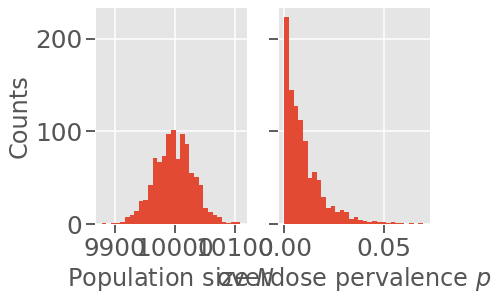

In [15]:
f, (ax1, ax2) = plt.subplots(1,2, sharey=True)
ax1.hist(data['N'],bins=30);
ax1.set_ylabel('Counts');
ax1.set_xlabel('Population size $N$');

ax2.hist(data['p'],bins=30);
ax2.set_xlabel('overdose pervalence $p$');

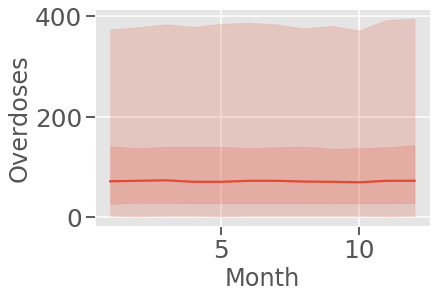

In [16]:
plot_data_timeseries(data['x'])

# Why this happening? 

Maybe it's because the screen is splitted by half.

a random walk with drift, $W_t$.

$$W_t \sim N(w_{t-1} + \mu_w,\sigma_w^2)$$

or alternatively,
$$W_t \sim W_{t-1} + N(\mu_w,\sigma_w^2)$$



[[1 2 3]
 [4 5 6]]


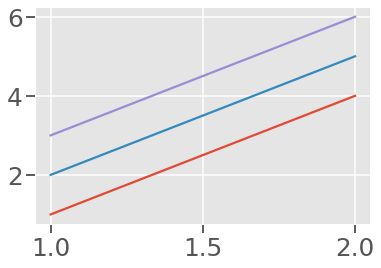

In [17]:
# warming up
x = np.array([[1,2,3],[4,5,6]])
print(x)
# x.cumsum(axis=1)
x.cumsum(axis=0)
y = x.swapaxes(0,1)

np.arange(1,13) # do not take the last one
np.arange(1,13).shape

plt.plot(np.arange(1,3), x)

# plt.plot(np.arange(1,3), y): error of first dimension 

#  It seems for x axis, first dimension of x is taken as well as 
# y's first dimension, then for y's second dimension,
# different colours is used for them.

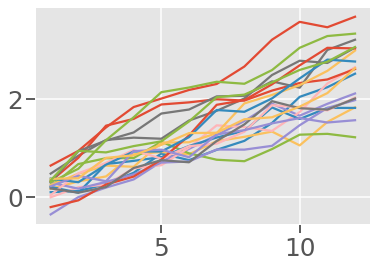

In [18]:
# apply the random walk model of sample size 20 for every month

n_months = 12; n_samples = 20

# first we make a 12 by 20 matrix with elt from normal model

mu_w = 0.2
sigma_w = 0.2




x = np.random.normal(loc=mu_w ,scale=sigma_w, size = (n_samples,n_months))
shape(x)

ws = x.swapaxes(1,0).cumsum(0)

plt.plot(np.arange(1,n_months+1), ws);
# use np.cumsum for cummulative summation and swapaxes method
# to swap the axes so that you match the first dimension 

In [19]:
# warming up for method generating

x, y = [1,2]
print(x,y)

x, y = (1,2)
print(x,y)

print("seems tuple or list can cast values to variables.")

print(logit(1/2)) # logarithm of odd
print("logit: log + odd. gives us a value of non probability")


print(expit(0)) # inverse logit: (1/(1+exp(-x))) gives us a prob

print(1+ np.array([[1,2,3],[4,5,6]]))

1 2
1 2
seems tuple or list can cast values to variables.
0.0
logit: log + odd. gives us a value of non probability
0.5
[[2 3 4]
 [5 6 7]]


In [20]:
# Define a method called 'randomwalk_prevalence'
# it takes w_mu, w_sigma, initial precalence and list of shape 
# returns dict of 'N', 'p' and 'x'
 
def random_walk_prevalence(mu, sigma, init_p=0.01, shape=None):
    
    '''Create overdose samples for data generating process, where
overdoses are a random walk in inverse logit space

 The pupulation N has uncertainty
 
 The prevalence of overdose in a given month is p from Beta
 
 Parameters
 __________
 mu : float
 drift of random walk in inv-logit space
 sigma: float
 standard deviation of random walk in inv-logit space
 init_p : float.... if default value is given, no explanation?
 shape: list
 shape of random walk in format (n_months, n_samples)
 
 Returns
 ----------
 numpy array
     Samples of random walk process with shape( n_months, n_samples)
#
'''
    n_samples,n_months  = shape

    es = np.random.normal(mu,sigma,size = (n_samples, n_months))

    init_p_transformed = logit(init_p)

    es_cumsum = es.cumsum(axis=1)

    ws = es_cumsum + init_p_transformed

    data = expit(ws) #expit gives us probability

    return data

# it gets us es, which is values from Normal distribution

# we change it as probability using inverse logit function

# we add initial prevalence which is basically a probability

# to the matrix after transformation by inverse logit ftn.

# then we transform the matrix into matrix of probability

# it generate N of size (1000, 1) from Normal (10000, 1000)
# also p of size (1000, 1) from Beta (1, 99)



In [21]:
n_months=12;n_samples=20
dt = random_walk_prevalence(0.2,0.2, shape=(n_samples,n_months))


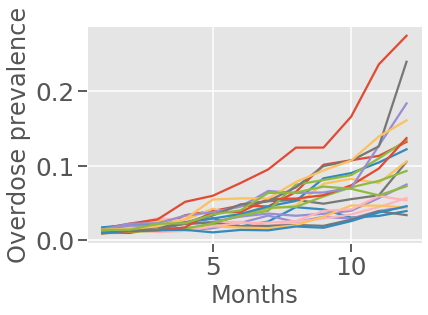

In [22]:
plt.xlabel('Months');plt.ylabel('Overdose prevalence')
plt.plot(np.arange(1,n_months+1),dt.swapaxes(0,1));

Basically this shows that when the first prevalence rate is 0.01 and the probability of overdose prevalence follows a certain normal distribution while the prevalence is random walk model, how the prevalence may increase over time. 

The method name was random_walk_prevalence. 

In [23]:
# Define a method called 'randomwalk_overdose_generation'
# it takes no argument, returns dict of 'N', 'p' and 'x'

# it generate N of size (1000, 1) from Normal (10000, 1000)
# p of size (1000, 12) from previous method.

def randomwalk_overdose_generation():
    '''Create overdose samples for data-generating process, where overdoeses
    are a random walk in inverse logit space.
    
        The pulunation N is from Normal(10000,1000)
        
        The pravalence of overdoses in a given month is p and is drawn from
        random walk of initial prevalence rate 0.01.
        Each month the rate p follows normal distributionmu_w 0.2 sigma_w 0.2.
        
        
    Parameters
    ---------
    None
    
    Returns 
    ---------
    dictionary
        Data generated for N,p and x.
    '''
    
    n_months, n_samples = 12, 1000
    N_mean, N_var = 10000, 1000
    
    N = np.random.normal(loc=N_mean, scale = N_var,size= (n_samples,1)).astype(int)
    mu_w, sigma_w = 0.2,0.2
    p = random_walk_prevalence(mu_w, sigma_w, shape=(n_samples,n_months))
    
    x = np.random.binomial(N,p, size = (n_samples,n_months))
    
    return {'N':N, 'p':p, 'x':x}


Remember that 'figure' is a kind of sketch book.
'subplot's are for the small plots inside of the sketch book (figure).

Text(0, 0.5, 'Counts')

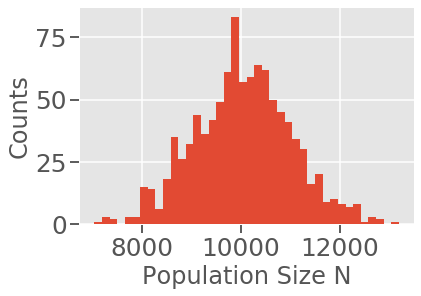

In [28]:
data = randomwalk_overdose_generation()
plt.figure;
plt.hist(data['N'],bins=40);
plt.xlabel('Population Size N');plt.ylabel('Counts')

In [29]:
size(data['p'])

12000

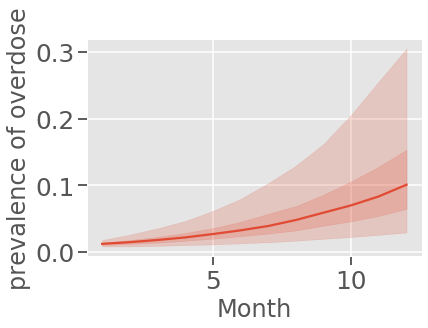

In [30]:
plot_data_timeseries(ys = data['p'],ylabel='prevalence of overdose')

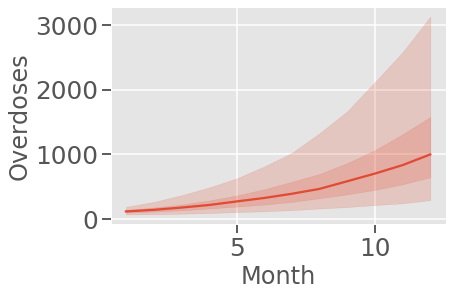

In [31]:
plot_data_timeseries(data['x'])

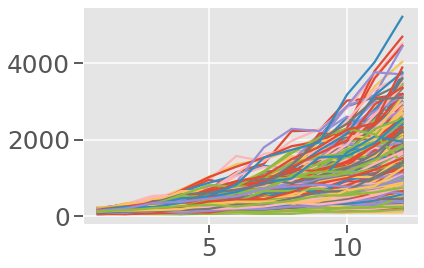

In [32]:
data = randomwalk_overdose_generation()
plt.plot(np.arange(1,n_months+1),data['x'].swapaxes(1,0));

We can see our plot method is better for visualization.

In [33]:
# Define a method called 'randomwalk_overdose_generation'
# it takes no argument, returns dict of 'N', 'p' and 'x'

# it generate N of size (1000, 1) from Normal (10000, 1000)
# p of size (1000, 12) from previous method.

def randomwalk_overdose_generation(N_mean= 10000, N_var= 1000, mu_w= 0.2, sigma_w=0.2, 
                                   n_months=12, n_samples=1000, init_p=0.01):
    '''Create overdose samples for data-generating process, where overdoeses
    are a random walk in inverse logit space.
    
        The pulunation N is from Normal(10000,1000)
        
        The pravalence of overdoses in a given month is p and is drawn from
        random walk of initial prevalence rate 0.01.
        Each month the rate p follows normal distributionmu_w 0.2 sigma_w 0.2.
        
        
    Parameters
    ---------
    None
    
    Returns 
    ---------
    dictionary
        Data generated for N,p and x.
    '''
    
    N = np.random.normal(loc=N_mean, scale = N_var,size= (n_samples,1)).astype(int)
    p = random_walk_prevalence(mu_w, sigma_w, init_p, shape=(n_samples,n_months))
    
    x = np.random.binomial(N,p, size = (n_samples,n_months))
    
    return {'N':N.flatten(), 'p':p, 'x':x}



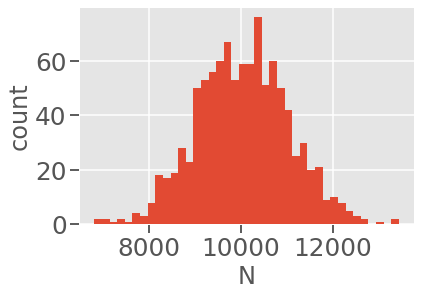

In [34]:
dt = randomwalk_overdose_generation(mu_w=0.0, sigma_w = 0.1)
plt.figure(); 
plt.hist(dt['N'], bins=40); plt.xlabel('N');plt.ylabel('count');



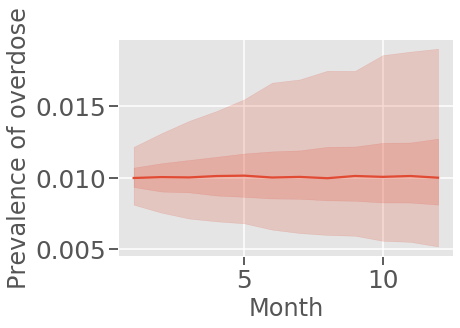

In [35]:
plot_data_timeseries(dt['p'],ylabel='Prevalence of overdose')


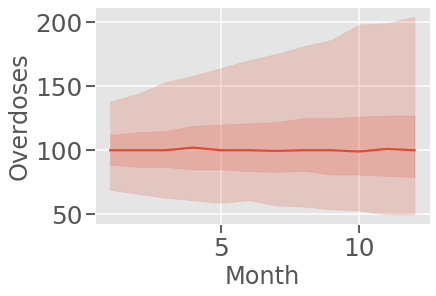

In [36]:
plot_data_timeseries(dt['x'])

# Question 0.
The goal of Bayesian inference is to find the probability of a set of parameters given some data. Normally we can write down the likelihood of observing some data $D$ given a set of parameters $\theta$. In the above example this would be a binomial probability, as that's what we used to generate the number of overdoses. Normally the likelihood is written as $P(D | \theta)$ (the probability of observing the data given the model parameters). The posterior is then written as $P( \theta | D)$ (the probability of observing the parameters given the data). The posterior can be written in terms of the likelihood using Bayes' rule,
$$ P(\theta | D) = \frac{P(D | \theta) P(\theta)}{P(D)} $$

**I don't think this is true**

# Question 1.
The prior is the probability of overdose prevalence $p$,
$$P(\theta) = P(p) \propto p^\alpha(1-p)^\beta.$$

In [38]:
D = np.array([40,50,51])


[40 50 51]


In [47]:
xs =np.linspace(0,0.02, num=1000)
# plt.plot(xs);

# hyper parameter
a,b = 1,99

pdf_prior = stats.beta(a,b).pdf(xs)

# D.size = 3 D.sum = 40+...+51
N= 10000
# posterior parameter of a, b
a_post = a + D.sum()
b_post = D.size*N + b - D.sum()
# post pdf of p

pdf_post = stats.beta(a_post, b_post).pdf(xs)

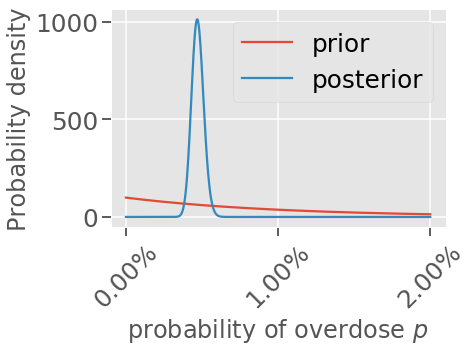

In [52]:
plt.figure();# figure is like a sketchbook

plt.plot(xs, pdf_prior, label='prior');
plt.plot(xs, pdf_post, label='posterior');
plt.xlabel('probability of overdose $p$');
plt.ylabel('Probability density');
plt.legend(); # the legend or colour

# sth to learn later
plt.gca().set_xticklabels(['{0:0.2%}'.format(x) for x in
                           plt.gca().get_xticks()], rotation=45);

How prior impacts posterior

In [53]:
def f(mu, log_sd):
    v = np.exp(log_sd)
    a = ((1 - mu) / v - 1 / mu) * mu ** 2
    b = a * (1 / mu - 1)
    pdf_prior = stats.beta(a,b).pdf(xs)
    
    a_post = a+ D.sum()
    b_post = b + D.size*N-D.sum()
    
    pdf_post = stats.beta(a_post, b_post).pdf(xs)
    
    plt.figure();
    plt.plot(xs, pdf_prior, label = 'prior');
    plt.plot(xs, pdf_post, label = 'post');
    plt.xlabel('probability of overdose $p$');
    plt.ylabel('Probability density');
    plt.legend();
    
    plt.gca().set_xticklabels(['{0:.2%}'.format(x) for x in plt.gca().get_xticks()],rotation=45);



In [58]:
interactive_plot = interactive(f, mu=(0.001, 0.02, 0.001),
                                      log_sd = (-20, -5, 0.1))
# nth happened
interactive_plot

# mu = (min, max, step)
# logsd = (min, max, step)

interactive(children=(FloatSlider(value=0.010000000000000002, description='mu', max=0.02, min=0.001, step=0.00…

In [69]:
# output = interactive_plot.children[-1]
# output # So children[-1] is deleting the slide

The children of the interactive are two integer-valued sliders and an output widget, produced by the widget abbreviations above.

In [68]:
#  interactive_plot.children


(FloatSlider(value=0.003,
description='mu', max=0.02, min=0.001, step=0.001),
 FloatSlider(value=-18.7,
description='log_sd', max=-5.0, min=-20.0),

Even getting into posterior is difficult in general, and there are to ways to do sampling from 'posterior' distribution. 
## 1. MCMC
## 2. variational Bayes